Final params with momentum: [ 0.32559052  0.25118105 -0.18322843 -0.25763791  0.12795261  0.15354314
  0.17913366]
gradients_log:[]
Final params without momentum: [ 0.33539635  0.2707927  -0.15381095 -0.2184146   0.17698175  0.21237809
  0.24777444]


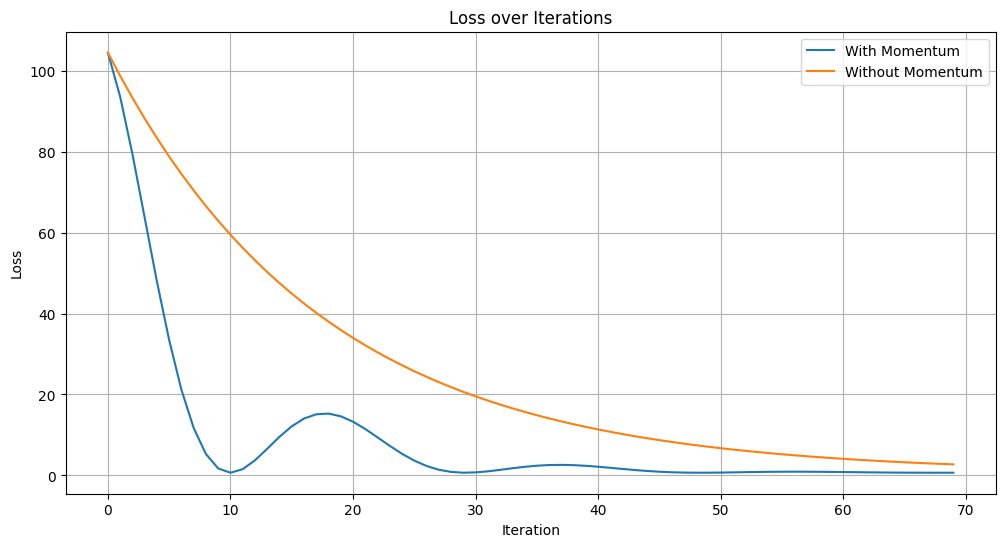

Final loss with momentum: 0.6705945935691285
Final loss without momentum: 2.7272949428656497
Initial loss with momentum: 104.43267130026668
Initial loss without momentum: 104.43267130026668
Reduction rate with momentum: 0.9935786896454939
Reduction rate without momentum: 0.9738846578478866
MSE with momentum: 0.6705945935691285
MSE without momentum: 2.7272949428656497
MAE with momentum: 0.6875577251007376
MAE without momentum: 1.4354888631400045
R² with momentum: -0.0058918903536928635
R² without momentum: -3.0909424142984747
MAPE with momentum: 46.88173459508606%
MAPE without momentum: 109.94654163633362%


In [10]:
import numpy as np
import traceback
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class GradientDescentWithMomentum:
    def __init__(self, iterations, learning_rate):
        self.iterations = iterations
        self.learning_rate = learning_rate

    def get_learning_rate(self):
        # 学習率を取得するメソッド
        return self.learning_rate

    def get_gradients(self, input, output, params):
        X = input  # 入力データ
        y = output  # 出力データ

        # 予測の計算
        predictions = np.dot(X, params)

        # 誤差の計算
        errors = predictions - y

        # 勾配の計算
        gradients = 2 * np.dot(X.T, errors) / len(y)

        # ログ用の勾配も同じにする
        gradients_for_log = gradients

        return gradients, gradients_for_log

    def compute_loss(self, input, output, params):
        X = input # 入力データ
        y = output  # 出力データ
        predictions = np.dot(X, params)
        errors = predictions - y
        loss = np.mean(errors ** 2)
        return loss

    def fit_without_momentum(self, input, output, initial_params):
        params = initial_params
        params_log = np.array([params])  # 初期化時に2次元配列として作成
        gradients_log = np.empty((0, 7))  # 初期化時に空の2次元配列を作成
        print(f'gradients_log:{gradients_log}')
        loss_log = []  # 損失のログ

        for i in range(self.iterations):
            try:
                gradients, gradients_for_log = self.get_gradients(input, output, params)
            except Exception as e:
                print(traceback.format_exc())
                print(f"Error occurred: {e}")
                continue

            # モメンタム法を使用しないパラメータの更新
            params = params - self.get_learning_rate() * gradients

            params_log = np.vstack([params_log, params])  # 2次元配列として積み重ね

            gradients_log = np.vstack([gradients_log, gradients_for_log])  # 2次元配列として積み重ね

            # 損失の計算とログ
            loss = self.compute_loss(input, output, params)
            loss_log.append(loss)

        return params, gradients_log, params_log, loss_log


    def fit_with_momentum(self, input, output, initial_params):
        params = initial_params
        params_log = np.array([params])  # 初期化時に2次元配列として作成
        gradients_log = np.empty((0, 7))  # 初期化時に空の2次元配列を作成
        loss_log = []  # 損失のログ

        momentum = 0.9
        velocity = np.zeros_like(params)

        for i in range(self.iterations):
            try:
                gradients, gradients_for_log = self.get_gradients(input, output, params)
            except Exception as e:
                print(traceback.format_exc())
                print(f"Error occurred: {e}")
                continue

            # モメンタム法を使用したパラメータの更新
            velocity = momentum * velocity - self.get_learning_rate() * gradients

            params = params + velocity

            params_log = np.vstack([params_log, params])  # 2次元配列として積み重ね

            gradients_log = np.vstack([gradients_log, gradients_for_log])  # 2次元配列として積み重ね

            # 損失の計算とログ
            loss = self.compute_loss(input, output, params)
            loss_log.append(loss)

        return params, gradients_log, params_log, loss_log
# 初期パラメータの設定
initial_params = np.array([0.4, 0.4, 0.04, 0.04, 0.5, 0.6, 0.7])

# サンプルデータ
input = np.array([
            [1, 2, 3, 4, 5, 6, 7],
            [1, 2, 3, 4, 5, 6, 7],
            [1, 2, 3, 4, 5, 6, 7]
        ])  # 入力データ
output = np.array([1, 2, 3])  # 出力データ

# モデルのインスタンス化
model = GradientDescentWithMomentum(iterations=70, learning_rate=0.0001)

# モメンタムを使用する場合
final_params_with_momentum, gradients_log_with_momentum, params_log_with_momentum, loss_log_with_momentum = model.fit_with_momentum(input, output, initial_params)
print("Final params with momentum:", final_params_with_momentum)

# モメンタムを使用しない場合
final_params_without_momentum, gradients_log_without_momentum, params_log_without_momentum, loss_log_without_momentum = model.fit_without_momentum(input, output, initial_params)
print("Final params without momentum:", final_params_without_momentum)

# 損失関数のログをプロットして比較
plt.figure(figsize=(12, 6))
plt.plot(loss_log_with_momentum, label='With Momentum')
plt.plot(loss_log_without_momentum, label='Without Momentum')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# 最終損失値
final_loss_with_momentum = loss_log_with_momentum[-1]
final_loss_without_momentum = loss_log_without_momentum[-1]

# 初期損失値
initial_loss_with_momentum = loss_log_with_momentum[0]
initial_loss_without_momentum = loss_log_without_momentum[0]

# 損失の減少率
reduction_rate_with_momentum = (initial_loss_with_momentum - final_loss_with_momentum) / initial_loss_with_momentum
reduction_rate_without_momentum = (initial_loss_without_momentum - final_loss_without_momentum) / initial_loss_without_momentum

print(f"Final loss with momentum: {final_loss_with_momentum}")
print(f"Final loss without momentum: {final_loss_without_momentum}")
print(f"Initial loss with momentum: {initial_loss_with_momentum}")
print(f"Initial loss without momentum: {initial_loss_without_momentum}")
print(f"Reduction rate with momentum: {reduction_rate_with_momentum}")
print(f"Reduction rate without momentum: {reduction_rate_without_momentum}")

# MSE
mse_with_momentum = mean_squared_error(output, np.dot(input, final_params_with_momentum))
mse_without_momentum = mean_squared_error(output, np.dot(input, final_params_without_momentum))

# MAE
mae_with_momentum = mean_absolute_error(output, np.dot(input, final_params_with_momentum))
mae_without_momentum = mean_absolute_error(output, np.dot(input, final_params_without_momentum))

# R^2
r2_with_momentum = r2_score(output, np.dot(input, final_params_with_momentum))
r2_without_momentum = r2_score(output, np.dot(input, final_params_without_momentum))

# MAPE
mape_with_momentum = np.mean(np.abs((output - np.dot(input, final_params_with_momentum)) / output)) * 100
mape_without_momentum = np.mean(np.abs((output - np.dot(input, final_params_without_momentum)) / output)) * 100

print(f"MSE with momentum: {mse_with_momentum}")
print(f"MSE without momentum: {mse_without_momentum}")
print(f"MAE with momentum: {mae_with_momentum}")
print(f"MAE without momentum: {mae_without_momentum}")
print(f"R² with momentum: {r2_with_momentum}")
print(f"R² without momentum: {r2_without_momentum}")
print(f"MAPE with momentum: {mape_with_momentum}%")
print(f"MAPE without momentum: {mape_without_momentum}%")


1. 平均二乗誤差(MSE)
 - 実際の値と予測値の差の二乗平均。値が小さいほど良いモデル。

2. 平均絶対誤差(MAE)
 - 実際の値と予測値の絶対値の平均。MSEと同様に値が小さいほど良いモデル。

3. 決定係数(R^2)
 - 1に近いほど良いモデル

4. 平均絶対パーセンテージ誤差
 - 予測値が実際の値からどれだけ離れているかの割合。値が小さいほど良い。